In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r'C:\Users\satyam\Desktop\project\project 3\assig 1\raw.githubusercontent.com_dsrscientist_dataset3_main_glass.csv',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
data.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')

# providing columns name to data

In [4]:
data.columns =['Id','refractive index','Sodium','Magnesium','Aluminium','Silicon','Potassium','Calcium','Barium','Iron','Type of glass']
data.head()

,Id,refractive index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
data.shape

(214, 11)

In [6]:
# removing unnessary column

In [7]:
data.drop(columns='Id',axis=1,inplace=True)
data

,refractive index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [8]:
data.info()  # cheking information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   refractive index  214 non-null    float64
 1   Sodium            214 non-null    float64
 2   Magnesium         214 non-null    float64
 3   Aluminium         214 non-null    float64
 4   Silicon           214 non-null    float64
 5   Potassium         214 non-null    float64
 6   Calcium           214 non-null    float64
 7   Barium            214 non-null    float64
 8   Iron              214 non-null    float64
 9   Type of glass     214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [9]:
data.isnull().sum()

refractive index    0
Sodium              0
Magnesium           0
Aluminium           0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
Type of glass       0
dtype: int64

In [10]:
# there is no null values in data set

In [11]:
data.describe()

,refractive index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [12]:
# there is no null values 
# there is big difference between std and mean
# there are some zeroes
# looks like some skewness in data set

In [13]:
# checks data is balamced or not
data['Type of glass'].value_counts()                  

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

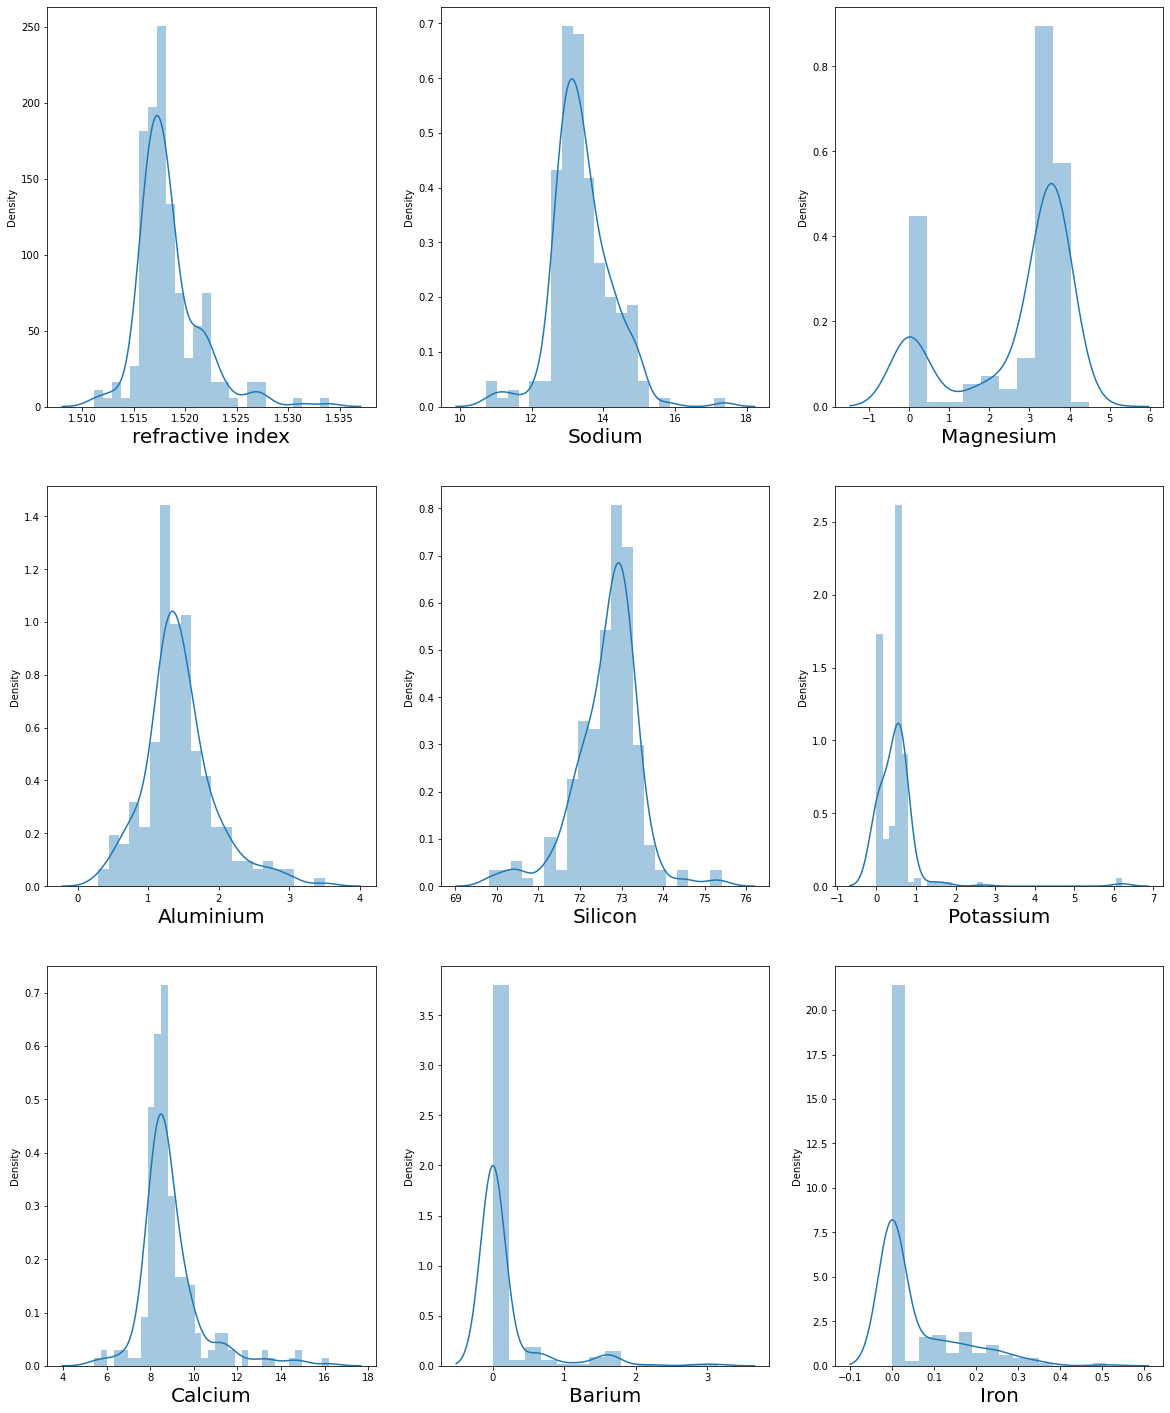

In [14]:
# cheking distribution of data
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()    

In [15]:
# there are some skewness in almost all column

In [16]:
data.skew()

refractive index    1.625431
Sodium              0.454181
Magnesium          -1.152559
Aluminium           0.907290
Silicon            -0.730447
Potassium           6.551648
Calcium             2.047054
Barium              3.416425
Iron                1.754327
Type of glass       1.114915
dtype: float64

In [17]:
df_feature=data.drop('Type of glass',axis=1)

# Removing outliers

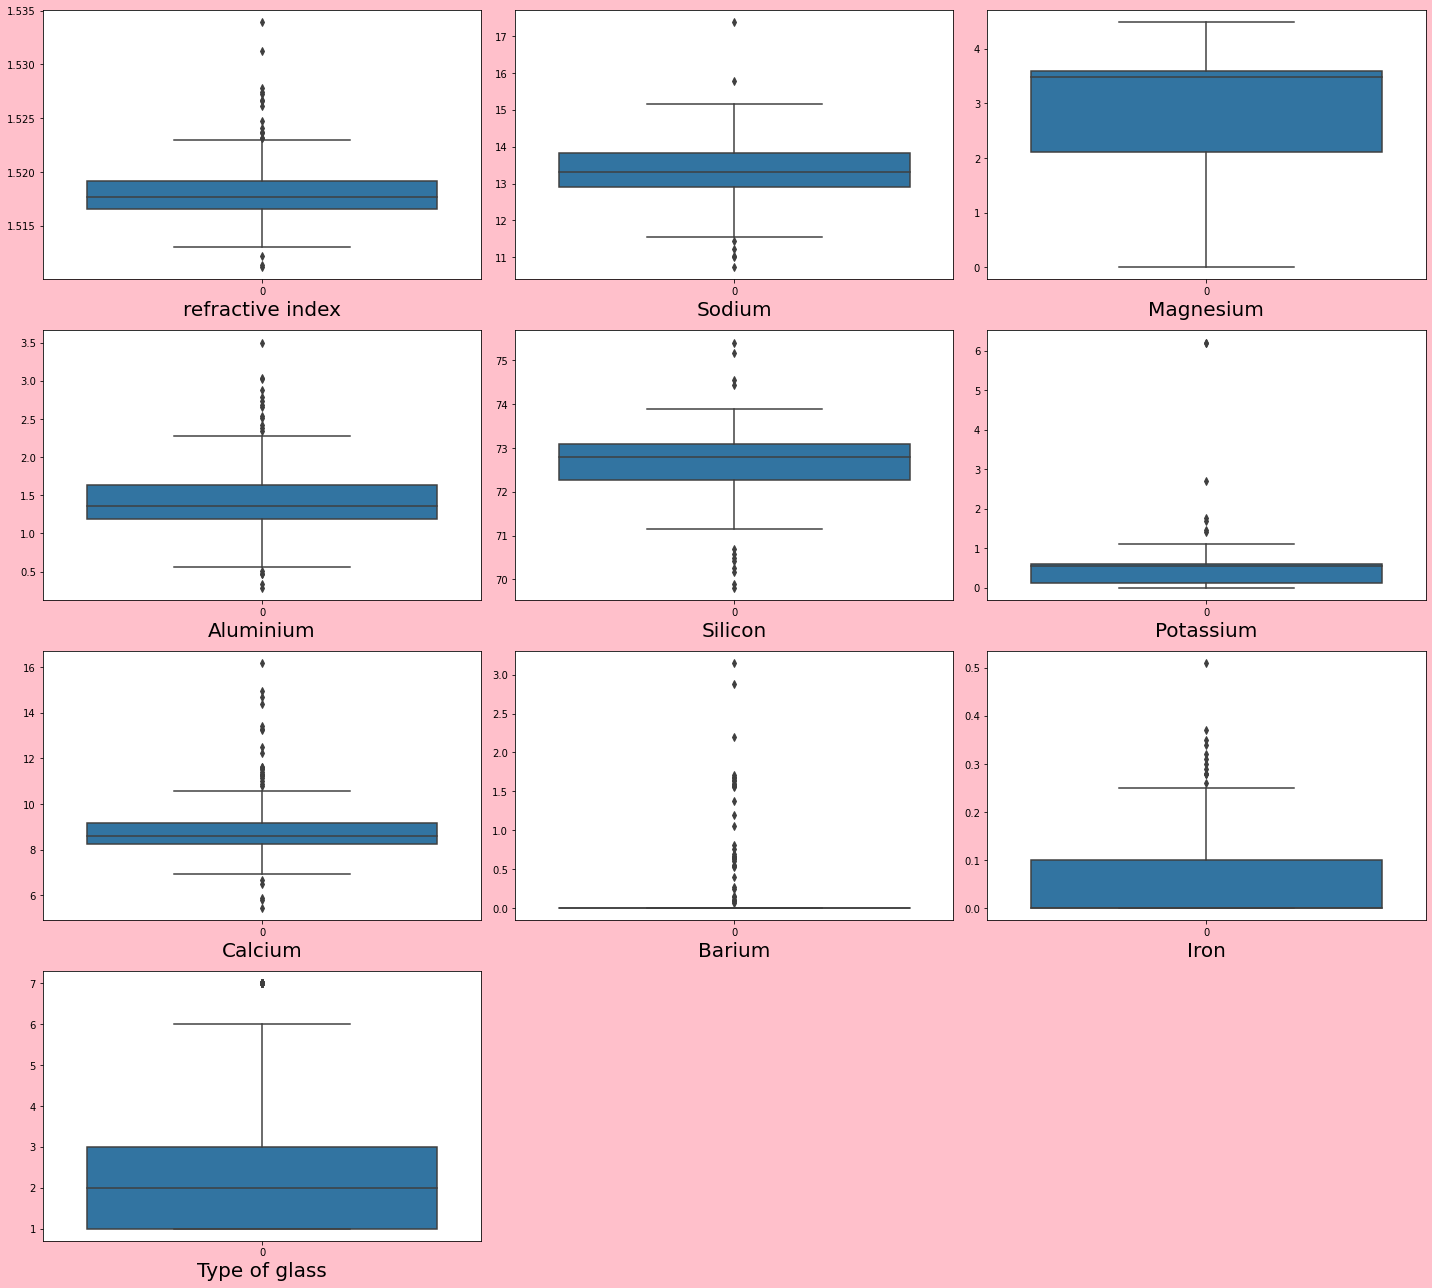

In [18]:
#cheking outliers in dataset
plt.figure(figsize=(20,18),facecolor='pink')
plotnumber=1
for column in data:
    if plotnumber<=11: #not taking outcome bcz it is 100%  real or true data
        plt.subplot(4,3,plotnumber)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()    

In [19]:
# fixing outlier with z score
from scipy.stats import zscore
z_score=zscore(data[['refractive index', 'Sodium', 'Magnesium', 'Aluminium', 'Silicon',
       'Potassium', 'Calcium', 'Barium', 'Iron']])
abs_z_score=np.abs(z_score)
filtering_enter=(abs_z_score<3).all(axis=1)
data=data[filtering_enter]  # reasining filter data to main data
data.describe()


,refractive index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,1.518062,13.416959,2.880000,1.422732,72.720619,0.431546,8.824639,0.123351,0.051598,2.618557
std,0.002288,0.673292,1.308715,0.443786,0.584852,0.282287,0.989154,0.357125,0.085782,2.030561
min,1.511310,11.030000,0.000000,0.290000,70.570000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516513,12.945000,2.855000,1.190000,72.372500,0.132500,8.240000,0.000000,0.000000,1.000000
50%,1.517635,13.305000,3.500000,1.360000,72.820000,0.555000,8.585000,0.000000,0.000000,2.000000
75%,1.518995,13.787500,3.610000,1.602500,73.087500,0.600000,9.077500,0.000000,0.090000,3.000000
max,1.527250,15.150000,4.490000,2.880000,74.550000,1.760000,12.500000,1.640000,0.320000,7.000000


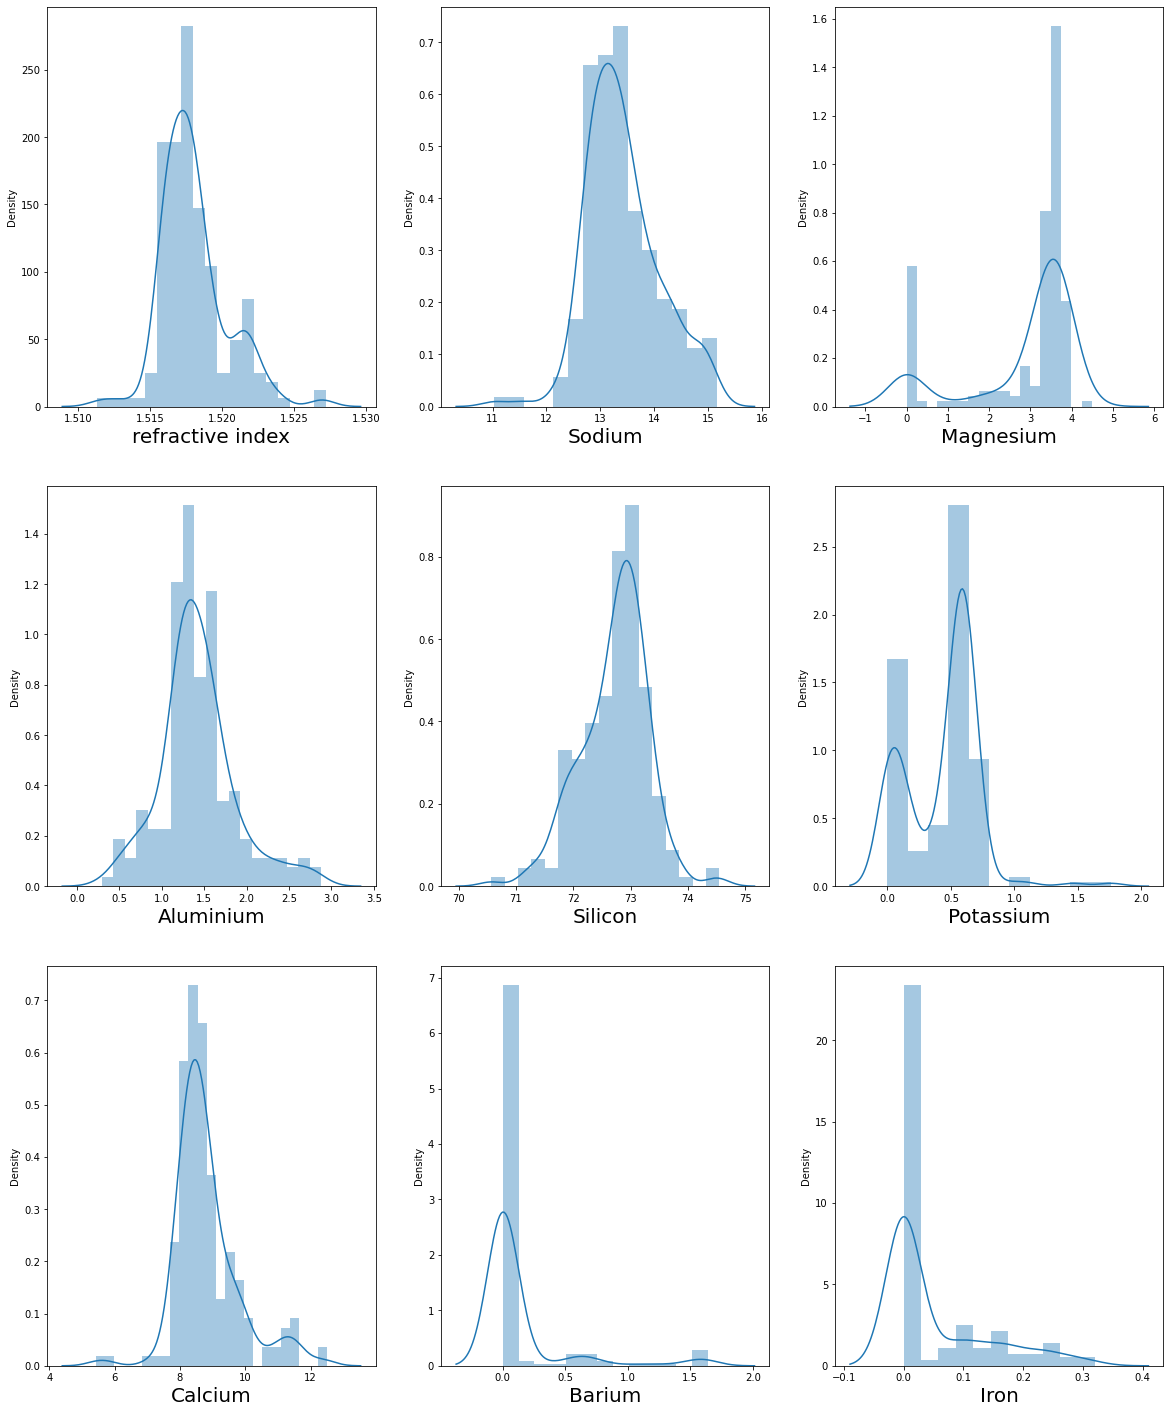

In [20]:
# cheking distribution of data
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()    

In [21]:
#some skewness is gone

# To find the relation between feature we use heat map

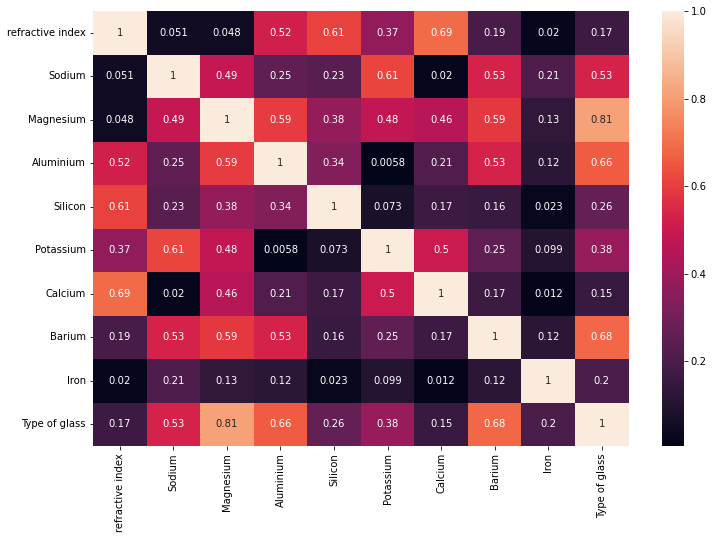

In [22]:
relation=data.corr().abs()  # cheking corelation between fetures vs feature and label
plt.figure(figsize=(12,8))
sns.heatmap(relation,annot=True)
plt.show()

In [23]:
x=data.drop(columns=['Type of glass'],axis=1)
y=data['Type of glass']

In [24]:
# megnesium are highly reated to tarege

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=41)

# model confidance/accuracy

In [26]:
##write one funtion and call as many as time to check accuracy score of different model
def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print('\n========== Train Result========')
        print(f'Accuracy score: {accuracy_score(y_train,y_pred)*100:.2f}%')
        
    elif train==False:
    
        pred=clf.predict(x_test)
        
        print('\n========== Test Result========')
        print(f'Accuracy score: {accuracy_score(y_test,pred)*100:.2f}%')

        print('\n\n Test classification Report\n',classification_report(y_test,pred,digits=2))

In [27]:
random_clf=RandomForestClassifier()
random_clf.fit(x_train,y_train)

RandomForestClassifier()

In [28]:
metric_score(random_clf,x_train,x_test,y_train,y_test, train=True) #train
metric_score(random_clf,x_train,x_test,y_train,y_test, train=False)#test


========== Train Result========
Accuracy score: 100.00%

========== Test Result========
Accuracy score: 91.53%


 Test classification Report
               precision    recall  f1-score   support

           1       0.92      0.96      0.94        23
           2       0.94      0.88      0.91        17
           3       0.67      0.50      0.57         4
           5       1.00      1.00      1.00         3
           6       0.75      1.00      0.86         3
           7       1.00      1.00      1.00         9

    accuracy                           0.92        59
   macro avg       0.88      0.89      0.88        59
weighted avg       0.91      0.92      0.91        59



# here 91 # accuracy it is good accuracy